# Keras with TensorFlow: Python Deep Learning and Neural Networks 

This is a fairly basic course that sets the groundwork to working with Keras/ML/Deep learning/AI etc., I highly recommend checking out the original video: 
https://www.youtube.com/watch?v=qFJeN9V1ZsI&t=8778s&ab_channel=freeCodeCamp.org

This first script covers the following topics (I'm afraid my titles may not correspond exactly to these, but they are similar)

- ⌨ Create an Artificial Neural Network with TensorFlow's Keras API
- ⌨Train an Artificial Neural Network with TensorFlow's Keras API
- ⌨Build a Validation Set With TensorFlow's Keras API
- ⌨Neural Network Predictions with TensorFlow's Keras API
- ⌨Create a Confusion Matrix for Neural Network Predictions

The second script roughly contains the following:

- ⌨Save and Load a Model with TensorFlow's Keras API
- ⌨Image Preparation for CNNs with TensorFlow's Keras API
- ⌨Build and Train a CNN with TensorFlow's Keras API
- ⌨CNN Predictions with TensorFlow's Keras API
- ⌨Build a Fine-Tuned Neural Network with TensorFlow's Keras API
- ⌨Train a Fine-Tuned Neural Network with TensorFlow's Keras API
- ⌨Predict with a Fine-Tuned Neural Network with TensorFlow's Keras API
- ⌨MobileNet Image Classification with TensorFlow's Keras API
- ⌨Process Images for Fine-Tuned MobileNet with TensorFlow's Keras API
- ⌨Fine-Tuning MobileNet on Custom Data Set with TensorFlow's Keras API
- ⌨Data Augmentation with TensorFlow' Keras API

## Building a sequential model

In [1]:
#x - recives data during training whenever we call the "fit" function. Our data will be in a numpy array
#y - contains the corresponding labels (target data) needs to be the same as x, will be in a numpy array too. 

### Data prep and processing

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle #scikitlearn
from sklearn.preprocessing import MinMaxScaler

In [3]:
#two empty lists, corresponding samples and labels.
train_labels = []
train_samples = []

Example data: 

- Experimental drug tested on people from ages 13-100 in clinical trial
- trial has *2100* people. Half are **under 65**, the other half are **65 or older**.  
- 95% of patients 65 and older experienced side effects 
- 95% of those 65 and under experienced no side effects

In [4]:
for i in range(50): 
    # the ~5% of younger individuals who did have side effects (approx 50)
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1) # 1 means they did have side effects
    
    # the ~5% of older individuals who DID NOT have side effects (approx 50)
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0) # 0 means they did not did have side effects
    

    

In [5]:
for i in range(1000):
    # the ~95% of younger individuals who DID NOT have side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # the ~95% of older individuals who did have side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [7]:
#now visualising the data
#in vscode, this inevitably exceeds the printout limit, so you can open it in a txt editor or change this limit depending. 

for i in train_samples[0:3]: #The age of our people in the training samples 
    print(i)
    

48
76
26


In [7]:
for i in train_labels: # these are the labels for having side effects (1) or not having side effects (0)
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [8]:
#now we need to change the data so it can work for the fit function, so we need to convert both to numpy arrays. 
#then, we shuffle both our train labels and train samples to get rid of any order from data gen process:

train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [9]:
#scaling down our data to a  0 to 1 scale can make our neural network more efficient, thats what we do now: 

scaler = MinMaxScaler(feature_range=(0,1)) #creates a feature range from 0 to 1
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) # now we compress our age range from 13-100, down to a 0 to 1 scale
# the -1 to 1 is just a formality, because fit transform doesn't accept 1D data by default, we just have to change it this way. 

In [10]:
#checking the scaled data, 
for i in scaled_train_samples: 
    print(i)

[0.20689655]
[0.65517241]
[0.25287356]
[0.50574713]
[0.77011494]
[0.66666667]
[0.7816092]
[0.7816092]
[0.59770115]
[0.5862069]
[0.94252874]
[0.05747126]
[0.08045977]
[0.65517241]
[0.2183908]
[0.85057471]
[0.13793103]
[0.88505747]
[0.18390805]
[0.77011494]
[0.59770115]
[0.79310345]
[0.57471264]
[0.54022989]
[0.05747126]
[0.31034483]
[0.56321839]
[0.16091954]
[0.79310345]
[0.74712644]
[0.68965517]
[0.70114943]
[0.72413793]
[0.81609195]
[0.04597701]
[0.04597701]
[0.8045977]
[0.85057471]
[0.6091954]
[0.1954023]
[0.25287356]
[0.02298851]
[0.18390805]
[0.98850575]
[0.48275862]
[0.49425287]
[0.90804598]
[0.64367816]
[0.44827586]
[0.17241379]
[0.20689655]
[0.98850575]
[0.64367816]
[0.54022989]
[0.65517241]
[0.93103448]
[1.]
[0.14942529]
[0.04597701]
[0.87356322]
[0.32183908]
[0.98850575]
[0.83908046]
[0.71264368]
[0.70114943]
[0.25287356]
[0.17241379]
[0.93103448]
[0.6091954]
[0.33333333]
[0.86206897]
[0.1954023]
[0.3908046]
[0.77011494]
[0.63218391]
[0.02298851]
[0.12643678]
[1.]
[0.73563218]

### simple tf.keras Sequential Model

In [20]:
#%pip uninstall tensorflow 
#%pip install tensorflow-gpu

In [11]:
#tf version:

import sys
print (sys.version)
# 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
import tensorflow as tf
print(tf.__version__)
# my output was => 1.13.1

#https://www.tensorflow.org/install/source
#see, that tensorflow_gpu-2.8.0 needs: CUDA Toolkit v11.2, cuDNN SDK v8.1

#https://developer.nvidia.com/cuda-toolkit-archive
#select: CUDA Toolkit 10.0 and download base installer (2 GB)
#installation settings: select only CUDA
#my installation path was: C:\Users\klaws\AppData\Local\Temp\CUDA

#https://developer.nvidia.com/rdp/cudnn-archive (needs registration, but it is simple)
#select "Download cuDNN v8.1



3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]
2.8.0


In [14]:
#assuming you already have tensorflow
#conda install -c conda-forge keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam #these last two are for training the model, not building it. 
from tensorflow.keras.metrics import categorical_crossentropy

In [15]:
#If you want to try and run on GPU, note I had trouble configuring gpu usage in WSL for tensorflow. 

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [16]:
#Building the model itself: 

"""
this is a list of layers, the first layer is actually the second layer overall (this is the first hidden layer, 
we don't explicity define the input layer, but we tell it using the input_shape parameter, it accepts this and then
passes it to the first hidden layer. 

An activation function in a neural network defines how the weighted sum of the input is transformed into an output 
from a node or nodes in a layer of the network. Rectified Linear Unit (ReLU) is one such function.

more on this: 

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
"""

model = Sequential([
    Dense(units=16, input_shape=(1,), activation = 'relu'), #16 nodes/neurons, this is pretty arbitrary. 
    Dense(units=32, activation='relu'), #another hidden dense layer. 
    Dense(units=2, activation = 'softmax') #we generally deploy softmax on the output layer of neural networks. 
]) 

#output layer, two units - two possible classes, patient with or without side effects
#softmax is probability for each output class (for any given patient). 

In [17]:
#visual architecture of our model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Training the artifical neural network

- ADAM is a common optimizer function, **An optimizer is a function or an algorithm that modifies the attributes of the neural network**, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy

- **What is loss?** The Loss Function is one of the important components of Neural Networks. Loss is nothing but a prediction error of a Neural Net. In simple words, the Loss is used to calculate the gradients. And gradients are used to update neural net weightings.

In [18]:
#want to judge the model by accuracy. 
model.compile(optimizer=Adam(learning_rate=0.0001),loss ='sparse_categorical_crossentropy', metrics =['accuracy'])

- *Batch size*: How many samples are to be passed and processed through the neural network at one time
- *Epochs*: How many times the neural network will train on all of our data (30x before completing the training process)
- *Shuffle*:True by default, but the data is being shuffled by default to remove any order in data.
- *Verbose*: the most verbose of output messages, can be 0,1, or 2. 

In [19]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)
#remember, in this case, an accurary of 50% would mean no better than chance. 

Epoch 1/30
210/210 - 0s - loss: 0.6622 - accuracy: 0.5310 - 474ms/epoch - 2ms/step
Epoch 2/30
210/210 - 0s - loss: 0.6237 - accuracy: 0.6338 - 123ms/epoch - 585us/step
Epoch 3/30
210/210 - 0s - loss: 0.5812 - accuracy: 0.7181 - 123ms/epoch - 586us/step
Epoch 4/30
210/210 - 0s - loss: 0.5421 - accuracy: 0.7724 - 124ms/epoch - 592us/step
Epoch 5/30
210/210 - 0s - loss: 0.5037 - accuracy: 0.8100 - 123ms/epoch - 586us/step
Epoch 6/30
210/210 - 0s - loss: 0.4664 - accuracy: 0.8314 - 123ms/epoch - 586us/step
Epoch 7/30
210/210 - 0s - loss: 0.4311 - accuracy: 0.8595 - 123ms/epoch - 585us/step
Epoch 8/30
210/210 - 0s - loss: 0.3993 - accuracy: 0.8748 - 121ms/epoch - 575us/step
Epoch 9/30
210/210 - 0s - loss: 0.3713 - accuracy: 0.8990 - 120ms/epoch - 572us/step
Epoch 10/30
210/210 - 0s - loss: 0.3481 - accuracy: 0.8990 - 120ms/epoch - 570us/step
Epoch 11/30
210/210 - 0s - loss: 0.3294 - accuracy: 0.9114 - 120ms/epoch - 573us/step
Epoch 12/30
210/210 - 0s - loss: 0.3146 - accuracy: 0.9181 - 123m

### Building a validation set with TF's Keras API

- We want an accurate model, with low loss and high accuracy. However, we don't just take a model and train it for the sake of training it in real life. Therefore, we use something called a validation set, which helps us tell how well our model is generalizing. 

- Before the training begins, we can take a subset. Essentially, we can prevent overfitting. There are two ways we can create a validation set using tf.keras.sequential. The first way is to create a data structure to hold this data, and then place the data in this the same way we do for the training set. 

- This will be a tuple of Numpy arrays/tensors, i.e. valid set = (x_val, y_val). wher x_val is a numpy array or tensor containing validiation samples, and y_val contains validation labels. 

In [20]:
#We now pass an additional parameter, Validation as another parameter to model.fit() 

#valid set = tuple(x_val, y_val)
#e.g. x:13,54,65,23,80 and y: 0,1,1,0,1, as a numpy array of tuples would be (13,0),(54,1),(65,1),(23,0), and (80,1) 

#model.fit(
#    x=scaled_train_samples, 
#    y=train_labels,
#    validation_data= valid_set,
#    batch_size=10,
#    epochs=30, 
#    verbose=2
#)

In [21]:
#However, it's also just easier to let Keras make this for us. 

model.fit(
    x=scaled_train_samples, 
    y=train_labels,
    validation_split = 0.1, # the last 10% of our training set 
    batch_size=10,
    epochs=30, 
    verbose=2
)

"""
NOTE: Unless your data is already shuffled, you risk bias, because validation split takes the last 10% in this case,
IF that last 10% of the data had all the people who did have side effects, it would remove those from the training data, and create an 
unrepresenative validation set. 
"""

Epoch 1/30
189/189 - 0s - loss: 0.2532 - accuracy: 0.9397 - val_loss: 0.2197 - val_accuracy: 0.9524 - 227ms/epoch - 1ms/step
Epoch 2/30
189/189 - 0s - loss: 0.2527 - accuracy: 0.9413 - val_loss: 0.2190 - val_accuracy: 0.9524 - 135ms/epoch - 712us/step
Epoch 3/30
189/189 - 0s - loss: 0.2519 - accuracy: 0.9413 - val_loss: 0.2180 - val_accuracy: 0.9524 - 154ms/epoch - 815us/step
Epoch 4/30
189/189 - 0s - loss: 0.2512 - accuracy: 0.9402 - val_loss: 0.2174 - val_accuracy: 0.9524 - 138ms/epoch - 729us/step
Epoch 5/30
189/189 - 0s - loss: 0.2509 - accuracy: 0.9413 - val_loss: 0.2166 - val_accuracy: 0.9524 - 134ms/epoch - 708us/step
Epoch 6/30
189/189 - 0s - loss: 0.2503 - accuracy: 0.9413 - val_loss: 0.2159 - val_accuracy: 0.9524 - 134ms/epoch - 710us/step
Epoch 7/30
189/189 - 0s - loss: 0.2499 - accuracy: 0.9402 - val_loss: 0.2152 - val_accuracy: 0.9524 - 144ms/epoch - 762us/step
Epoch 8/30
189/189 - 0s - loss: 0.2495 - accuracy: 0.9423 - val_loss: 0.2145 - val_accuracy: 0.9524 - 132ms/epoch

'\nNOTE: Unless your data is already shuffled, you risk bias, because validation split takes the last 10% in this case,\nIF that last 10% of the data had all the people who did have side effects, it would remove those from the training data, and create an \nunrepresenative validation set. \n'

### Building a test set with TF's Keras API

Inference - The model takes things it's learned in training, and then infer things about what it's shown. Typically, after the model is trained and validated, we then use it it to infer based on the test set.

In [22]:
#The test and training data should be prepared in the same format as the training data

In [23]:
test_labels = []
test_samples = []

for i in range(50): 
    # the ~5% of younger individuals who did have side effects (approx 50)
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1) # 1 means they did have side effects
    
    # the ~5% of older individuals who DID NOT have side effects (approx 50)
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0) # 0 means they did not did have side effects
    
for i in range(1000): #
    # the ~95% of younger individuals who DID NOT have side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # the ~95% of older individuals who did have side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)
    

In [24]:
#again, we want to rescale the data as we did previously
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [25]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [26]:
#for i in scaled_test_samples:
#    print(i)

Now let's predict:

In [27]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [28]:
for i in predictions:
    print(i)
    
    # for each element in our test set, we get a probability of the patient NOT experiencing a side effect on the left, and experiencing a side effect on the right 

[0.9278477  0.07215224]
[0.1317888 0.8682112]
[0.9687168  0.03128325]
[0.959661   0.04033897]
[0.34792832 0.65207165]
[0.44857937 0.5514206 ]
[0.96764684 0.03235315]
[0.9613449  0.03865516]
[0.11980847 0.8801915 ]
[0.11980847 0.8801915 ]
[0.02323896 0.976761  ]
[0.10878084 0.8912192 ]
[0.30173883 0.69826114]
[0.96416914 0.03583087]
[0.9684153  0.03158468]
[0.96912664 0.03087334]
[0.03548995 0.96451   ]
[0.22084008 0.7791599 ]
[0.07314882 0.9268512 ]
[0.02323896 0.976761  ]
[0.0660934 0.9339066]
[0.9548811  0.04511891]
[0.95736146 0.04263851]
[0.0660934 0.9339066]
[0.959661   0.04033897]
[0.96885395 0.03114603]
[0.04855249 0.9514475 ]
[0.0660934 0.9339066]
[0.39716646 0.6028336 ]
[0.6049673  0.39503267]
[0.9685789  0.03142106]
[0.01360707 0.9863929 ]
[0.9703254  0.02967457]
[0.02323896 0.976761  ]
[0.44857937 0.5514206 ]
[0.96993095 0.03006906]
[0.03548995 0.96451   ]
[0.9673867 0.0326133]
[0.10878084 0.8912192 ]
[0.9703254  0.02967457]
[0.96594054 0.0340595 ]
[0.0187721  0.98122793]
[0

In [29]:
#now, we can round these these predictions based on which is more likely, e.g. [0.30173883 0.69826114], as the right is larger, we would assume the patient will have a side effect. 
rounded_predictions = np.argmax(predictions, axis = -1)

In [30]:
#gives us the larger probability of the above, as we can see from the 1st sample, they are more likely to not
#the 1st sample indeed has the higher probabilty of having side effects.

for i in rounded_predictions: 
    print(i)

0
1
0
0
1
1
0
0
1
1
1
1
1
0
0
0
1
1
1
1
1
0
0
1
0
0
1
1
1
0
0
1
0
1
1
0
1
0
1
0
0
1
1
0
0
1
0
0
1
1
1
0
1
1
0
0
0
1
1
1
0
0
0
1
0
1
1
0
1
1
0
0
1
1
0
0
0
0
1
0
0
0
0
1
1
0
0
1
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
0
1
0
0
1
0
0
1
1
0
1
1
1
1
1
0
1
0
1
1
0
0
1
1
0
1
1
1
0
0
0
1
0
1
0
1
1
0
1
0
1
1
1
0
0
1
1
0
0
1
1
0
1
1
0
1
1
1
1
1
1
0
0
0
0
1
1
0
1
0
1
1
1
0
1
1
0
0
0
0
1
1
0
1
0
0
1
1
0
1
0
1
0
1
1
1
0
1
0
1
0
0
0
0
0
1
0
0
1
1
1
1
1
0
1
0
0
1
0
0
1
1
1
1
0
0
1
1
1
0
1
0
1
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
1
1
0
1
1
0
1
1
0
0
1
1
0
0
0
0
0
1
0
0
1
1
0
1
1
0
0
0
1
1
0
1
0
1
0
0
1
1
1
0
0
1
0
0
1
1
0
1
1
0
0
1
0
1
1
1
1
1
0
1
0
0
1
1
0
1
1
0
1
0
1
0
1
0
1
1
1
1
0
1
0
0
0
1
1
1
0
1
0
0
0
1
1
0
0
1
0
1
1
0
1
0
0
1
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
1
0
1
0
1
1
0
1
1
0
0
1
0
1
0
0
1
1
1
1
1
0
0
0
1
0
0
0
0
1
1
1
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
1
1
0
0
1
1
1
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
1
0
1
1
0
1
1
1
1
1
0
1
0
1
0
0
1
1
0


### Creating a confusion matrix to visualize our results: 

Using the predictions we passed to the np.argmax(), we can now visualize these predictions easier. 

In [31]:
#importing the corrrect libraries: 
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools 
import matplotlib.pyplot as plt

In [32]:
cm = confusion_matrix(y_true=test_labels, y_pred = rounded_predictions)

In [33]:
#This can be copied directly from the sklearn website, essentially it creates the confusion plot matrix. 

def plot_confusion_matrix(cm, classes, normalize = False, title="Confusion Matrix", cmap=plt.cm.Blues): 
    """
    This function prints andp lots the confusion matrix/ 
    Normalization can be applied by setting "normalize=ture"
    """
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1000   50]
 [  50 1000]]


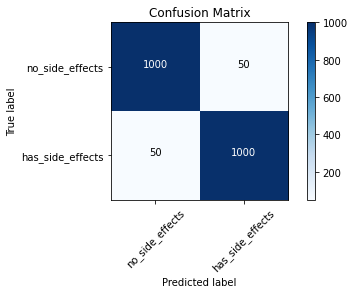

In [34]:
#now we define our plot labels, and can then pass them to the plot_confusion_matrix function, along with our cm itself, and title. 

cm_plot_labels = ['no_side_effects', 'has_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title = 'Confusion Matrix')

So reading the confusion matrix, we see that it predicted that 975 had no side effects correctly, and correctly predicted when 1001 did have side effects. However, it predicted that 49 had no side effects when they did, and 75 had predicted side effects, but did not. Overall, it correctly predicted 1976/2100 or ~94%. Note this will change a little bit each time you run it. 

### Saving and Loading a Keras Sequential Model: 



In [37]:
os.getcwd() # to check your current working directory. 

'c:\\Users\\klaws\\OneDrive - Broken String Biosciences Ltd\\Desktop\\Keras'

In [35]:
#1st way: check if model exists and if not, save the model to the disk. This is the most comphrehensive way to save the model.
#note: An H5 file is a data file saved in the Hierarchical Data Format (HDF). It contains multidimensional arrays of scientific data. for me, I've simply saved this in a place called models in my working directory

import os.path 
if os.path.isfile('models/medical_trial_model.h5') is False: 
    model.save('models/medical_trial_model.h5')

This function saves: 
- the model architecture, allowing us to recreate the model 
- the model weights 
- the training configuration(loss, optimizer)
- the optimizer state (meaning we can pick up exactly from where we left off)

In [38]:
from tensorflow.keras.models import load_model #need to import the load function model
new_model = load_model('models/medical_trial_model.h5') #pointing to where the saved model is one disk

In [39]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [46]:
new_model.get_weights()

[array([[ 0.60695016, -0.06510419, -0.01497401, -0.00318539, -0.10916966,
         -0.44297224,  0.5848023 , -0.4578367 , -0.23799199,  0.44943434,
          0.4358807 ,  0.55359095,  0.47487906, -0.4463933 ,  0.03690064,
          0.3007414 ]], dtype=float32),
 array([-0.16097525,  0.        ,  0.2661285 ,  0.        ,  0.        ,
         0.        , -0.16990057,  0.        ,  0.        , -0.15233788,
        -0.1231501 , -0.06862164, -0.14340694,  0.        ,  0.2858344 ,
        -0.13426399], dtype=float32),
 array([[-2.69263655e-01, -2.20788270e-01, -6.52021170e-03,
         -3.64142686e-01, -3.28499258e-01,  6.18450582e-01,
         -1.49980396e-01, -3.80512267e-01,  1.45001993e-01,
         -1.40030235e-01,  4.17964727e-01,  2.67151088e-01,
          2.17640791e-02,  2.59554446e-01,  6.60515726e-01,
         -2.48210430e-02, -2.69277215e-01, -1.98059589e-01,
         -2.07537234e-01, -5.61254144e-01, -1.07654259e-01,
         -3.67554128e-02, -2.95444857e-02, -1.40978873e-01,
 

In [40]:
new_model.optimizer

In [41]:
#2nd way: model.to_json(): only if we want to save the model architecture: 

json_string=model.to_json()

#we could also save it as a YAML string, like below: 
#save as YAML 
#yaml_string = model.to_yaml()

In [42]:
json_string # visualising the json architecture

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_3_input"}}, {"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

In [43]:
from tensorflow.keras.models import model_from_json
model_architecture=model_from_json(json_string)

In [44]:
model_architecture.summary() #

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [45]:
#3 option: if you only need to save the weights, you can do that to, like so:

#will store the weights in a folder called models in your working directory if it doesn't already exist. 
import os.path 
if os.path.isfile('models/my_model_weights.h5') is False: 
    model.save_weights('models/my_model_weights.h5')

In [46]:
#thing is, if we didn't save the previous model, then although we would have the weights, we would have a model to load them into. 
#this step recreates the architecture of our model above

model2 = Sequential([
    Dense(units=16, input_shape=(1,),activation='relu'),
    Dense(units=32, activation = 'relu'),
    Dense(units=2, activation= 'softmax')
])

In [47]:
model2.load_weights('models/my_model_weights.h5') #we could load these into a model which had 5 layers, as it wouldn't match.
                                                  #our model only had 3 layers (2 hidden and one output).

In [48]:
model.get_weights()

[array([[-0.12359354, -0.4987703 ,  0.61473113, -0.2382522 , -0.02490729,
          0.38006663,  0.52471614,  0.21261032,  0.3713991 ,  0.37950435,
          0.5600491 , -0.5373269 ,  0.4891327 , -0.4677189 , -0.07070929,
          0.71583134]], dtype=float32),
 array([ 0.19088323,  0.        , -0.19413556,  0.        ,  0.21798423,
        -0.13037911, -0.09516904, -0.10149787,  0.03316083, -0.14028601,
        -0.17615022,  0.        , -0.18061829,  0.        ,  0.        ,
        -0.16805834], dtype=float32),
 array([[-0.03913292,  0.50397694, -0.555228  , -0.16081132,  0.36537325,
         -0.61357313, -0.35756412, -0.3003957 , -0.50136256, -0.20656267,
         -0.37326926, -0.03211907,  0.58225536,  0.44525796,  0.29344937,
         -0.5698804 , -0.20574129,  0.31653193, -0.1827909 , -0.21020582,
         -0.5307425 , -0.23999737, -0.50317943,  0.0200175 ,  0.4454568 ,
         -0.36351123, -0.29843006, -0.00614807, -0.5588267 ,  0.3249578 ,
          0.6758664 ,  0.3121931 ],
 